In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import glob
import torch
import network_utils as networkUtils

# Prune by Latency

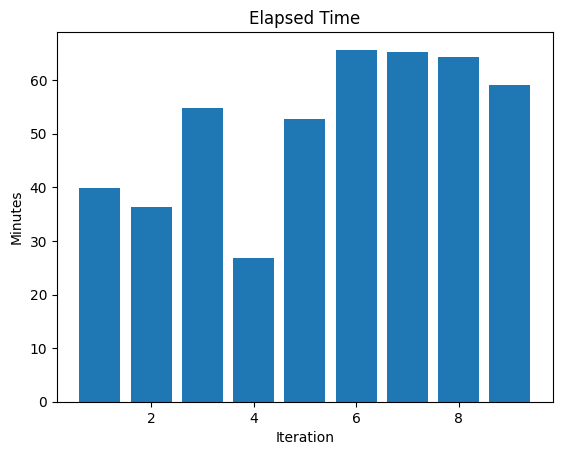

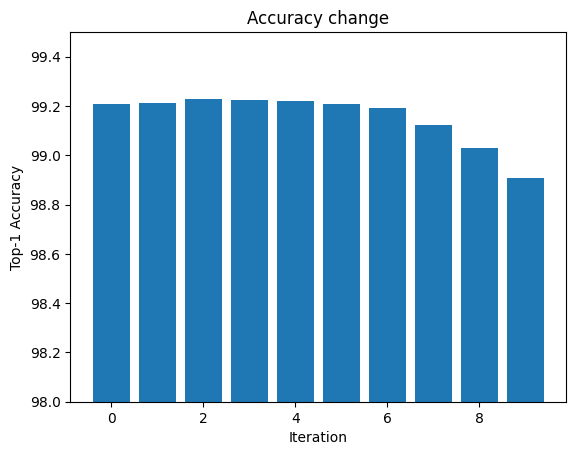

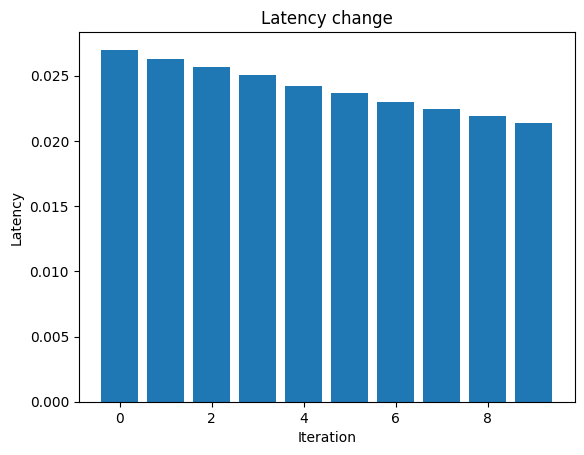

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


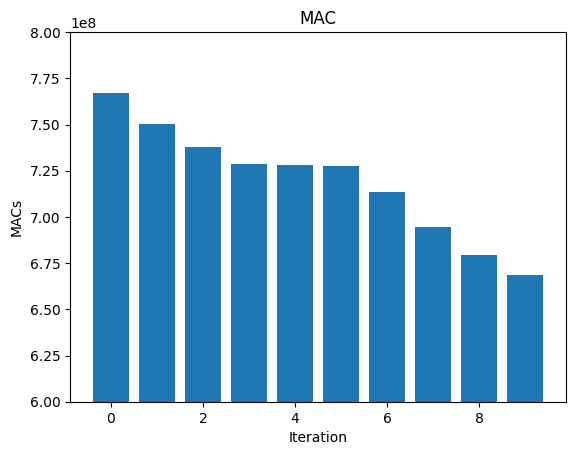

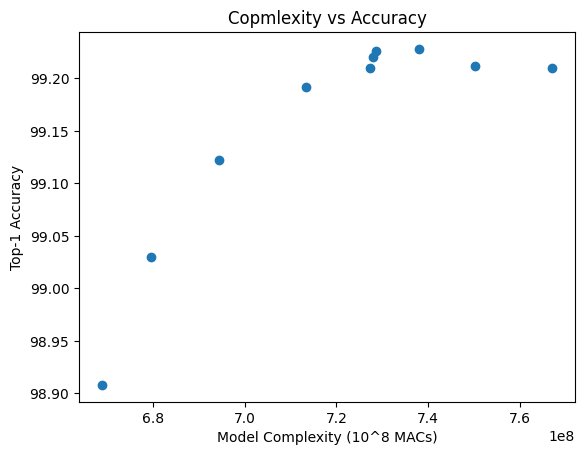

In [145]:
latency_logs = open("models/alexnet/fed/core-2-prune-by-latency/logs.txt","r").read()
latency_logs

elapsed_times = [float(line.split(" ")[-2])/60 for line in list(filter(lambda line: "Iteration" in line and "finished" in line, latency_logs.split("\n")))]
idx = np.arange(1,len(elapsed_times)+1)

#Elapsed Time
plt.bar(idx, elapsed_times)
plt.xlabel("Iteration")
plt.ylabel("Minutes")
plt.title("Elapsed Time")
plt.show()

#Accuracy vs Latency
latency_best_models = pd.read_csv("models/alexnet/fed/core-2-prune-by-latency/master/history.txt", delimiter=",")

plt.bar(latency_best_models["Iteration"], latency_best_models["Accuracy"])
plt.ylim(98,99.5)
plt.xlabel("Iteration")
plt.ylabel("Top-1 Accuracy")
plt.title("Accuracy change")
plt.show()

plt.bar(latency_best_models["Iteration"], latency_best_models["Resource"])
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency change")
plt.show()

#Best model each iteration
model_paths = glob.glob("models/alexnet/fed/core-2-prune-by-latency/master/*.pth.tar")

flops_arr = []
idx = []

for model_path in model_paths:
    model = torch.load(model_path)
    network_utils = networkUtils.__dict__["alexnet"](model, (3,224,224), "data/")
    network_def = network_utils.get_network_def_from_model(model)
    flops = network_utils._compute_weights_and_flops(network_def)
    total_flops = flops[1] + flops[3]
    flops_arr.append(total_flops)
    idx.append(int(Path(model_path).stem.split("_")[1]))

plt.bar(idx, flops_arr)
plt.ylim(6*10**8,8*10**8)
plt.xlabel("Iteration")
plt.ylabel("MACs")
plt.title("MAC")
plt.show()

#Accuracy vs MAC
flops_ordered = [x for y, x in sorted(zip(idx, flops_arr))]
acc = latency_best_models["Accuracy"].tolist()

plt.scatter(flops_ordered, acc)
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Model Complexity (10^8 MACs)")
plt.title("Copmlexity vs Accuracy")
plt.show()

# Prune by MAC

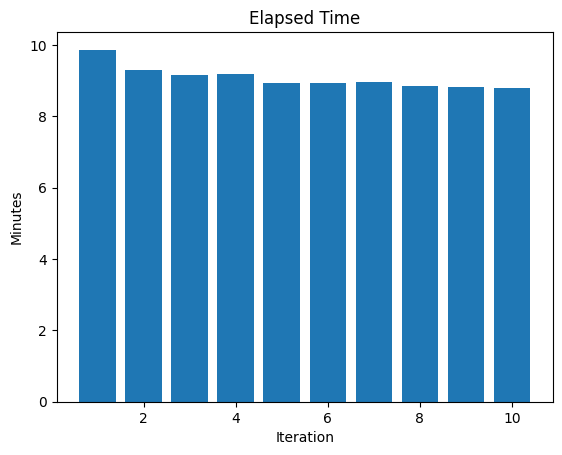

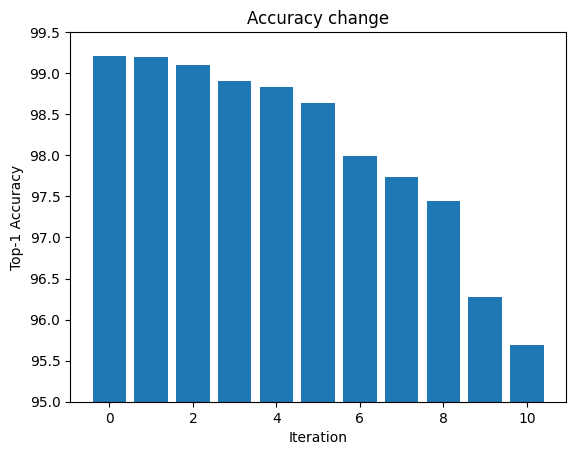

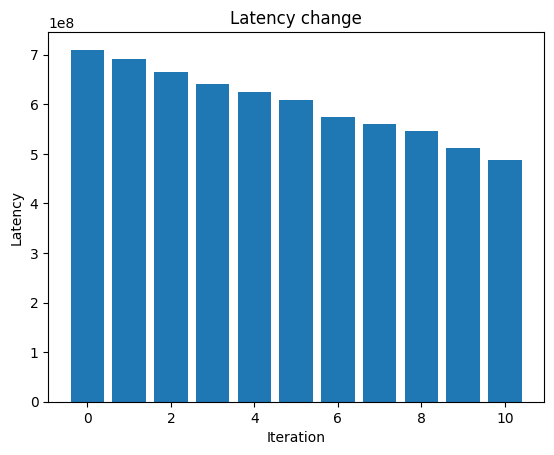

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


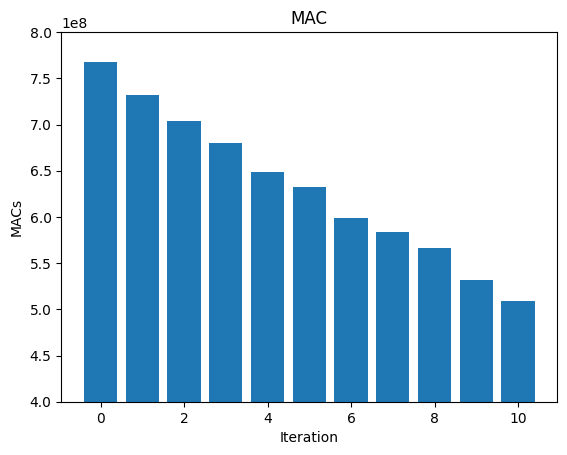

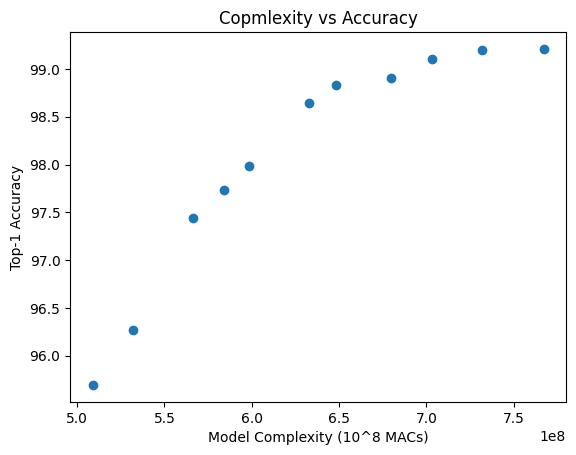

In [149]:
parent_folder = "models/alexnet/fed/core_1_prune-by-mac"

latency_logs = open(os.path.join(parent_folder,"logs.txt"),"r").read()
latency_logs

elapsed_times = [float(line.split(" ")[-2])/60 for line in list(filter(lambda line: "Iteration" in line and "finished" in line, latency_logs.split("\n")))]
idx = np.arange(1,len(elapsed_times)+1)

#Elapsed Time
plt.bar(idx, elapsed_times)
plt.xlabel("Iteration")
plt.ylabel("Minutes")
plt.title("Elapsed Time")
plt.show()

#Accuracy vs Latency
latency_best_models = pd.read_csv(os.path.join(parent_folder,"master/history.txt"), delimiter=",")

plt.bar(latency_best_models["Iteration"], latency_best_models["Accuracy"])
plt.ylim(95,99.5)
plt.xlabel("Iteration")
plt.ylabel("Top-1 Accuracy")
plt.title("Accuracy change")
plt.show()

plt.bar(latency_best_models["Iteration"], latency_best_models["Resource"])
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency change")
plt.show()

#Best model each iteration
model_paths = glob.glob(os.path.join(parent_folder,"master/*.pth.tar"))

flops_arr = []
idx = []

for model_path in model_paths:
    model = torch.load(model_path)
    network_utils = networkUtils.__dict__["alexnet"](model, (3,224,224), "data/")
    network_def = network_utils.get_network_def_from_model(model)
    flops = network_utils._compute_weights_and_flops(network_def)
    total_flops = flops[1] + flops[3]
    flops_arr.append(total_flops)
    idx.append(int(Path(model_path).stem.split("_")[1]))

plt.bar(idx, flops_arr)
plt.ylim(4*10**8,8*10**8)
plt.xlabel("Iteration")
plt.ylabel("MACs")
plt.title("MAC")
plt.show()

#Accuracy vs MAC
flops_ordered = [x for y, x in sorted(zip(idx, flops_arr))]
acc = latency_best_models["Accuracy"].tolist()

plt.scatter(flops_ordered, acc)
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Model Complexity (10^8 MACs)")
plt.title("Copmlexity vs Accuracy")
plt.show()